In [1]:
# Decision Tree and Random Forest :  Type of SUpervised learning model and can be used for both regression and classification
# but mostly used in classification.
#  it is used for both categorical (classes) and continuous data.

# DT : flow-chart like structure where internal node = feature or attribute, branch = decision rule and leaf represents an outcome.
# flowchart : root node is decision node, branches are sub-nodes and leafs are leaf nodes (no further split). set of sub-node and leaf nodes is 
# sub-tree.

#  It uses ASM (Attribute selection measure) to better select attribute or feature for selecting root node. ASM is splitting criterion
# that partition data in best possible manner.Also known as splitting rule. It gives rank to features or attribute. Best score is 
# splitting attribute.

# Information gain : more messy the data is more information gain.
# ENtropy : more the IF more impure the data is i.e more entropy. Shannon introduced entropy. It splits the data in uneven numbers
# of positive and negatives.

# PROCESS : It selects the dependent variable and calculates its entropy which is used as IG before split
# After that it calculates entropy of each attribute and their IG (IG after split)
# IGBS - IGAS = IG. Highest IG is represented as root node and it follows  with 2nd, 3rd highests and so on until there
# will be no more splitting.

# Gini index can also be used for calculation where ther are 2 classes or binary classification

In [ ]:
### Random FOrest : Its a cluster of Decision tress with highest IGs combined to get greater classification and accuracy.
# it uses bagging method which learns from different DTs, ensembles them, learn from them (create learning model) 
# and gives good results.

# Bagging (Bootstrap aggregation) : It combines predictions from multiple ML algorithms and gives good prediction than
# any individual model

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix, r2_score

In [18]:
df = pd.read_csv("C:/Users/Rushikesh/Desktop/Python Files/Students.csv")
df.head(2)

,JEEPRE,JEEMAINS,STATUS
0,34.623660,78.024693,0
1,30.286711,43.894998,0


In [19]:
X = df[['JEEPRE', 'JEEMAINS']]
X.head(2)

,JEEPRE,JEEMAINS
0,34.623660,78.024693
1,30.286711,43.894998


In [20]:
Y = df['STATUS']
Y.head(2)

0    0
1    0
Name: STATUS, dtype: int64

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=1234)

In [22]:
def Dectree_model(X_train, X_test, Y_train):
    model_dt = DecisionTreeClassifier(criterion='entropy', max_depth=3)  ## by default it is Gini
    model_fit = model_dt.fit(X_train, Y_train)
    pred = model_fit.predict(X_test)
    return pred

In [23]:
pred = Dectree_model(X_train, X_test, Y_train)
pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1],
      dtype=int64)

In [33]:
def metrics_dectree(Y_test, pred):
    acc = accuracy_score(Y_test,pred)
    cnf = confusion_matrix(Y_test,pred)
    prec = precision_score(Y_test, pred)
    clf = classification_report(Y_test,pred)
    return acc, cnf, prec, clf

In [34]:
acc, cnf, prec, clf = metrics_dectree(Y_test, pred)

In [35]:
acc

0.9

In [36]:
cnf

array([[ 6,  0],
       [ 2, 12]], dtype=int64)

In [37]:
prec

1.0

In [38]:
clf

'              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.86         6\n           1       1.00      0.86      0.92        14\n\n    accuracy                           0.90        20\n   macro avg       0.88      0.93      0.89        20\nweighted avg       0.93      0.90      0.90        20\n'

In [49]:
def rf_model(X_train, X_test, Y_train):
    model_dt1 = RandomForestClassifier(criterion='entropy', max_depth=5)  ## by default it is Gini
    model_fit1 = model_dt1.fit(X_train, Y_train)
    pred1 = model_fit1.predict(X_test)
    return pred1

In [50]:
pred1 = rf_model(X_train, X_test, Y_train)
pred1

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [51]:
def metrics_rf(Y_test, pred):
    acc1 = accuracy_score(Y_test,pred)
    cnf1 = confusion_matrix(Y_test,pred)
    prec1 = precision_score(Y_test, pred)
    clf1 = classification_report(Y_test,pred)
    return acc1, cnf1, prec1, clf1

In [52]:
acc1, cnf1, prec1, clf1 = metrics_rf(Y_test, pred)

In [53]:
acc1

0.9

In [54]:
cnf1

array([[ 6,  0],
       [ 2, 12]], dtype=int64)

In [55]:
prec1

1.0

In [56]:
clf1

'              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.86         6\n           1       1.00      0.86      0.92        14\n\n    accuracy                           0.90        20\n   macro avg       0.88      0.93      0.89        20\nweighted avg       0.93      0.90      0.90        20\n'

<Axes: >

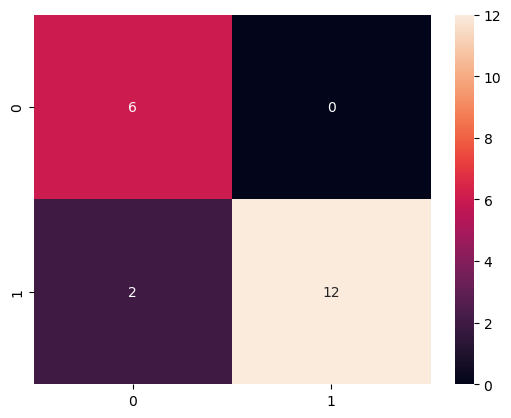

In [57]:
sns.heatmap(confusion_matrix(Y_test,pred1), annot= True)

In [ ]:
#### Save the best models for future predictions using these functions